#**<font color='green'>Clase 1: Explorando Datos</font>**

In [149]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick
import matplotlib.pyplot as plt


print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')


Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


In [150]:
datos = pd.read_csv('/content/flights.csv')

datos.shape

(71175, 11)

In [151]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [152]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


* **El método describe es una herramienta poderosa que proporciona estadísticas descriptivas de un conjunto de datos. Este método calcula varias estadísticas resumidas a la vez, incluyendo el .```conteo (número de elementos).```, .```media.```, .```desviación estándar (medida de dispersión de los datos).```, .```mínimo (el valor más bajo).```, .```los cuartiles (25%, 50% y 75% - correspondientes al primer cuartil, mediana y tercer cuartil, respectivamente).``` y .```el máximo (el valor más alto).```. Además, es posible obtener las estadísticas descriptivas para las variables categóricas: df.```describe(include=['O'])```.**-

In [153]:
#Variables Numericas
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [154]:
# Variables Categoricas
datos.describe(include=['O'])

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


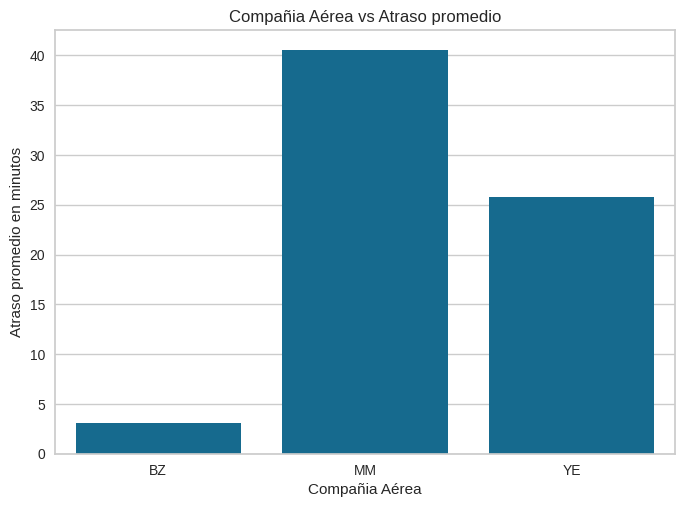

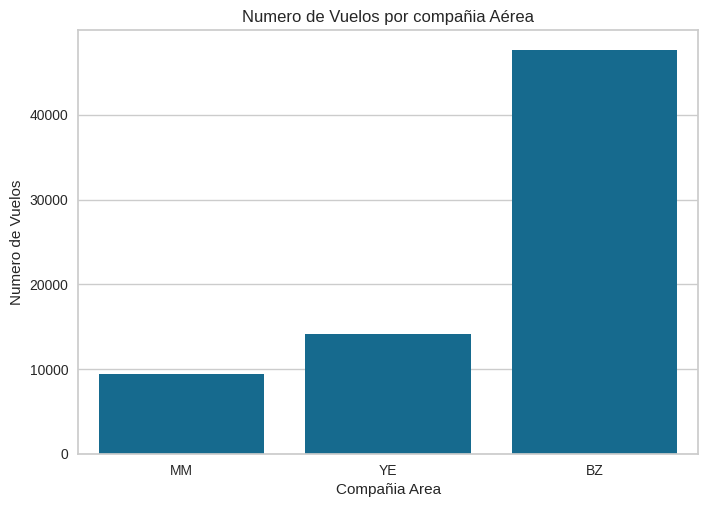

In [155]:
#Graficar los Datos
avg_delay = datos.groupby('airline')['delay'].mean().reset_index()

sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañia Aérea vs Atraso promedio')
plt.xlabel('Compañia Aérea')
plt.ylabel('Atraso promedio en minutos')

plt.show();

#Vamos a Crear un grafico que nos permita ver el # de Vuelos por compañia area

sns.countplot(data=datos, x='airline')
plt.title('Numero de Vuelos por compañia Aérea')
plt.xlabel('Compañia Area')
plt.ylabel('Numero de Vuelos')

plt.show();

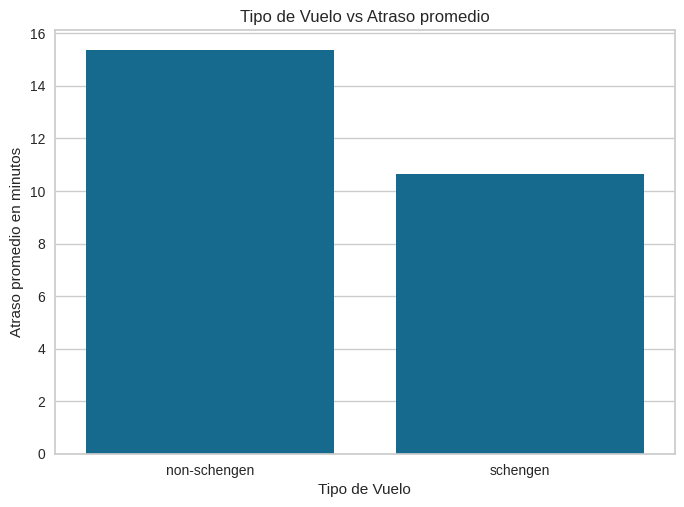

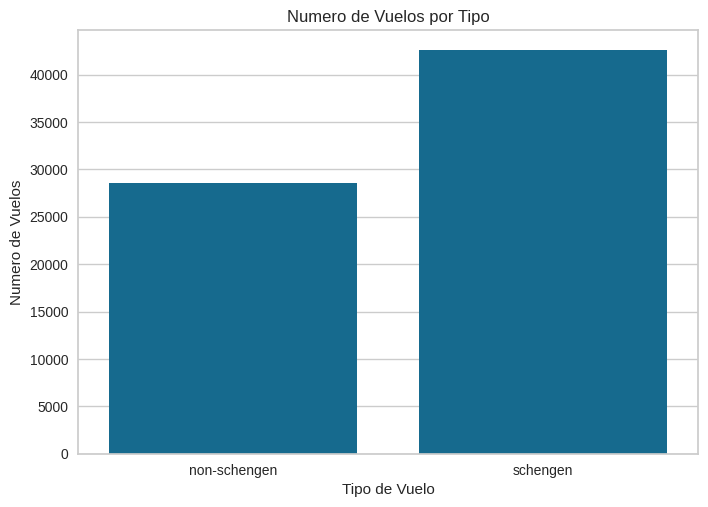

In [156]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()

sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de Vuelo vs Atraso promedio')
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Atraso promedio en minutos')

plt.show();

# 2do Grafico

sns.countplot(data=datos, x='schengen')
plt.title('Numero de Vuelos por Tipo')
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Numero de Vuelos')

plt.show();

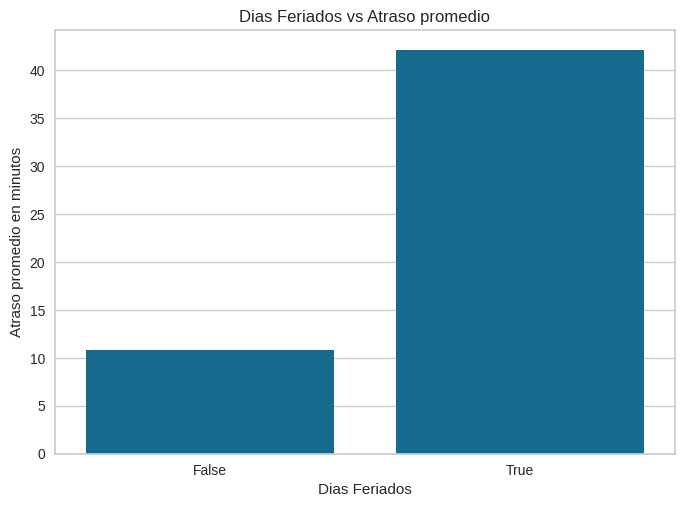

In [157]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()

sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Dias Feriados vs Atraso promedio')
plt.xlabel('Dias Feriados')
plt.ylabel('Atraso promedio en minutos')

plt.show();

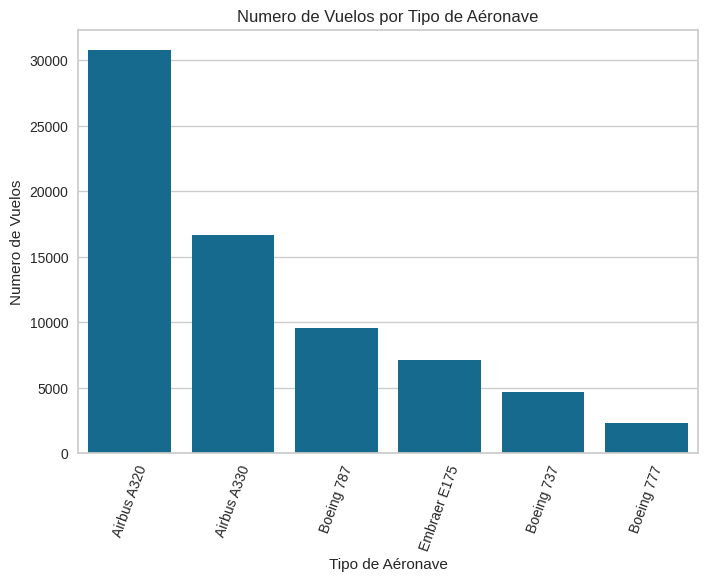

In [158]:
# Ordena las aeronaves en un indice
order = datos['aircraft_type'].value_counts().index

sns.countplot(data=datos, x='aircraft_type', order=order)
plt.title('Numero de Vuelos por Tipo de Aéronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de Aéronave')
plt.ylabel('Numero de Vuelos')

plt.show();

<Axes: xlabel='arrival_time', ylabel='Count'>

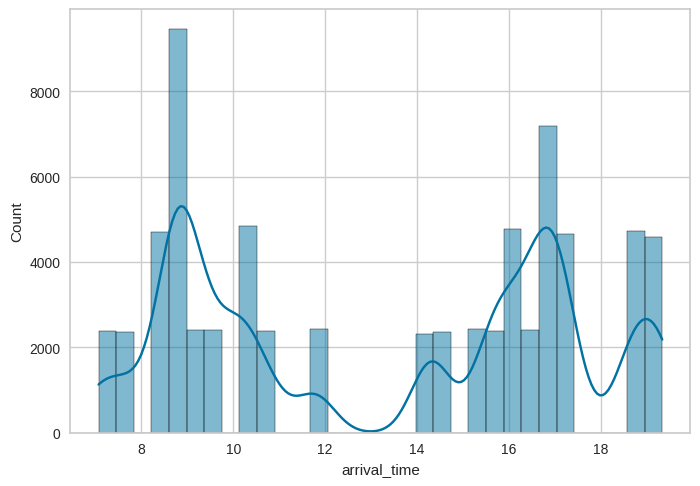

In [159]:
#Creando un Histograma

sns.histplot(data=datos, x='arrival_time', kde=True)

* Funcion que nos ayuda establecer el Rango intercuantil

In [160]:
def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna], [75,25])
  iqr = q75 - q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

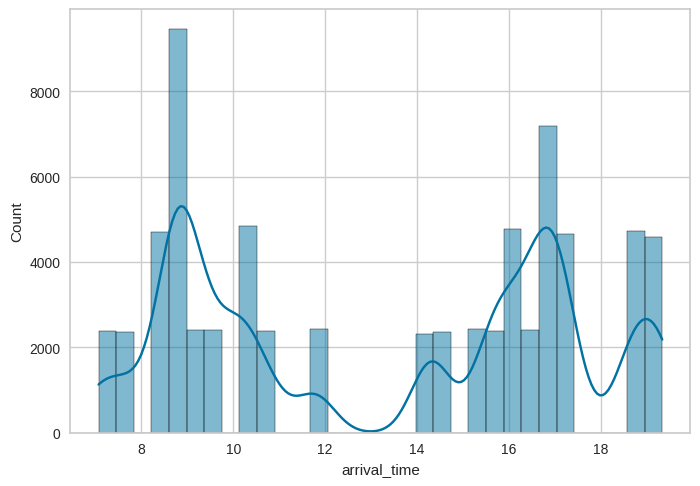

In [161]:
#Horario de Llegada
binwidth = ancho_bin(datos, 'arrival_time')
sns.histplot(data=datos, x='arrival_time', kde=True, binwidth=binwidth);

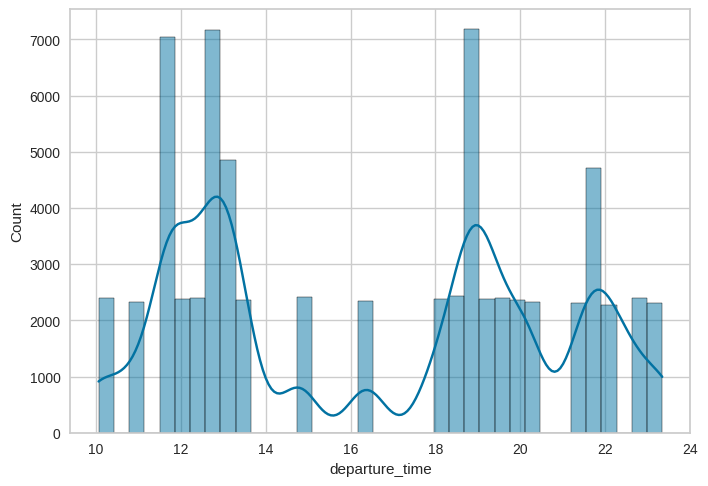

In [162]:
# Horario de Salida
binwidth = ancho_bin(datos, 'departure_time')
sns.histplot(data=datos, x='departure_time', kde=True, binwidth=binwidth);

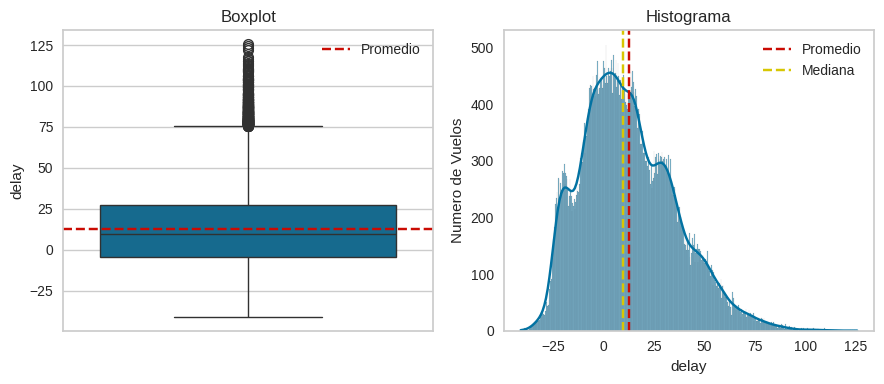

In [163]:
from matplotlib.lines import lineStyles
from ipywidgets.widgets.widget_int import Color
# Retraso de los Vuelos

atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

# Grafico Boxplot

fig, ax = plt.subplots(1,2, figsize=(9,4))

sns.boxplot(data=datos, y='delay', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()

sns.histplot(data=datos, x='delay', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('Numero de Vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()

plt.show();

#**<font color='green'>Clase 2: Feature Engineering</font>**



El feature engineering es un concepto fundamental en el campo de la ciencia de datos y el aprendizaje automático, y desempeña un papel crucial en el proceso de desarrollo de modelos predictivos y analíticos. Esta técnica implica la creación, transformación y selección de variables, también conocidas como "features", a partir de los datos brutos disponibles, con el fin de mejorar el rendimiento de los modelos. Pero, ¿qué serían features?

**¿Qué son las features?**

Las features son las variables o atributos que un modelo de machine learning utiliza para hacer predicciones o clasificaciones. Representan la información que el modelo tiene a su disposición para aprender patrones en los datos. Por ejemplo, si estamos construyendo un modelo para predecir el precio de una casa, las features pueden incluir el número de habitaciones, la superficie en metros cuadrados, la ubicación geográfica, la proximidad a escuelas, entre otras.

**La importancia del Feature Engineering:**

* Mejora el rendimiento del modelo: Elegir las features correctas y transformarlas adecuadamente puede resultar en modelos más precisos y eficientes. Features bien diseñadas pueden capturar información relevante y eliminar ruido en los datos.

* Reduce la dimensionalidad: En conjuntos de datos con muchas features, la dimensionalidad de los datos puede convertirse en un problema. El feature engineering puede ayudar a reducir la cantidad de features, manteniendo solo aquellas que son realmente informativas para el modelo.

**Técnicas de Feature Engineering:**

*Existen varias técnicas de feature engineering, incluyendo:*

* Creación de features: Esto implica la creación de nuevas features basadas en las existentes. Por ejemplo, combinar las features de superficie y valor de una propiedad para crear una feature que represente el valor por metro cuadrado de esa propiedad. O, si tienes datos de fecha y hora, puedes crear una nueva característica que represente el día de la semana. Esto puede ser útil porque tal vez haya patrones que ocurren en días específicos de la semana.

* Transformación de features: Se pueden aplicar funciones matemáticas a las features existentes para hacerlas más adecuadas para el modelo. Ejemplos incluyen aplicar logaritmos o escalar valores para reducir la escala en la que se encuentra la variable.

* Selección de features: No todas las features son igualmente importantes. La selección de features implica identificar y mantener solo las más relevantes para el problema en cuestión.



In [164]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

##* **Creando Nuevas Columnas**

In [165]:
# Se Crea Una columna 'Date' en el Dataframe,
# apartir de la columna 'day' y 'year'

datos['Date'] = datos['year'].astype(str) + '-' + (datos['day']+1).astype(str)
datos['Date'] = pd.to_datetime(datos['Date'], format='%Y-%j')
datos.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,Date
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277,2022-12-31
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348,2022-12-31
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080,2022-12-31
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [166]:
# Se Crea una columna 'is_weekend' que diga si es fin de semana o no
# apartir de la columna 'Date'

datos['is_weekend'] = datos['Date'].dt.weekday.isin([5,6])

In [167]:
# Se Crea una columna 'day_name', nomnbre del dia de la semana
# apartir de la columna 'Date'

datos['day_name'] = datos['Date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,Date,is_weekend,day_name
14525,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,238,2012,False,55.793480,2012-08-26,True,Sunday
19223,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,186,2013,False,15.753819,2013-07-06,True,Saturday
40013,19,MM,Airbus A320,schengen,TZF,16.245220,19.245220,112,2017,False,51.881443,2017-04-23,True,Sunday
57273,30,BZ,Embraer E175,schengen,PUA,8.923441,12.923441,168,2020,False,38.076116,2020-06-17,False,Wednesday
5165,6,YE,Boeing 787,schengen,AUZ,17.033688,19.033688,344,2010,False,13.474171,2010-12-11,True,Saturday


In [168]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  Date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

## Datos Codificados
* Vamos hacer las modificacion a las Variables de cadenas de caracteres

In [169]:
datos['schengen'].unique()

array(['non-schengen', 'schengen'], dtype=object)

In [170]:
datos['is_holiday'].unique()

array([False,  True])

In [171]:
datos['is_weekend'].unique()

array([False,  True])

In [177]:
# Reemplaza por 0 y 1
datos['schengen'] = datos['schengen'].replace({'non-schengen':0, 'schengen':1}).astype(int)
datos['is_holiday'] = datos['is_holiday'].replace({False:0, True:1}).astype(int)
datos['is_weekend'] = datos['is_weekend'].replace({False:0, True:1}).astype(int)

In [178]:
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,Date,is_weekend,day_name
2011,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,134,2010,0,-8.452763,2010-05-15,1,Saturday
45751,12,YE,Airbus A330,1,TZF,17.313731,21.313731,130,2018,0,42.557080,2018-05-11,0,Friday
24583,10,YE,Airbus A320,0,TCY,8.939996,11.939996,178,2014,0,26.273699,2014-06-28,1,Saturday
44280,23,YE,Embraer E175,1,TCY,18.801235,21.801235,32,2018,0,-18.194134,2018-02-02,0,Friday
25012,21,BZ,Boeing 737,1,FJB,7.065594,10.065594,207,2014,0,0.063409,2014-07-27,1,Sunday


## Creando la lista de las Variables Categoricas

In [174]:
categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

## Metodo pandas que nos permite codificar nuestras Variables con 0 y 1 de forma numerica ```pd.get_dummies()```

In [175]:
pd.get_dummies(data=datos, columns=categoricas, dtype=int).head(3)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,Date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0


In [179]:
# Almacenando en una variable
datos_codificados = pd.get_dummies(data=datos, columns=categoricas, dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,Date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
16026,14,1,7.708301,11.708301,338,2012,0,-20.700418,2012-12-04,0,...,0,0,1,0,0,0,0,0,1,0
50414,25,0,19.341235,23.341235,75,2019,0,13.889248,2019-03-17,1,...,0,0,0,0,0,0,1,0,0,0
22311,7,1,8.564949,13.564949,27,2014,0,39.790790,2014-01-28,0,...,0,1,0,0,0,0,0,0,1,0
11209,17,0,16.718722,21.718722,17,2012,0,-9.170939,2012-01-18,0,...,0,0,0,0,0,0,0,0,0,1
29665,7,1,8.564949,13.564949,152,2015,0,12.792670,2015-06-02,0,...,0,1,0,0,0,0,0,0,1,0


## El horario de salida y el horario de llegada, los datos se parecen mucho, para corroborar esto, utilizamos un metodo de pandas: ```.corr()```

In [180]:
datos[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


Hay una correlacion casi 100%, osea inversamente proporcional, mientras una aumenta la otra decrese proporcionalmente.

Y esto puede sesgar el modelo, por eso solo se debe dejar una sola.
******************************

Ahora procedemos e eliminar tambien las columnas que no nos sirven por ejemplo: flight_id, y las que usamos para crear las nuevas columnas

In [182]:
df = datos_codificados.drop(columns=['flight_id', 'departure_time', 'day', 'year', 'Date'])
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
15784,1,11.781391,0,2.498742,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
44680,1,11.781391,0,-23.341914,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
29885,0,16.571894,0,20.870265,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
41388,1,17.033688,0,-1.997246,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
52866,0,10.733469,0,-16.922173,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
22790,1,15.729617,0,-2.402133,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
38565,1,9.344097,0,-4.144360,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
47716,1,18.635384,0,-20.596428,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
33596,1,9.344097,0,17.383403,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
10721,1,17.313731,0,26.893151,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0,0,0
